<a href="https://colab.research.google.com/github/mrhamedani/Deep-learning-projects-Tensorflow/blob/main/1_Cars_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
df = pd.read_csv('auto-mpg.csv')   # This dataset is about cars. How many miles do they travel per gallon of gas?
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [11]:
train_dataset = df.sample(frac=0.8, random_state=0) #frac = 0.8 means 80% of the data will be used for training
test_dataset = df.drop(train_dataset.index)

x_train = train_dataset.copy()
y_train = x_train.pop('mpg')

x_test = test_dataset.copy()
y_test = x_test.pop('mpg')

## General view data and analysis

,count,mean,std,min,25%,50%,75%,max
mpg,317.0,23.395268,7.765711,10.0,17.0,22.4,29.0,46.6
cylinders,317.0,5.457413,1.699474,3.0,4.0,4.0,8.0,8.0
displacement,317.0,194.567823,104.163057,68.0,105.0,151.0,262.0,455.0
horsepower,317.0,104.646688,37.995187,46.0,76.0,94.0,125.0,225.0
weight,317.0,2983.987382,843.514967,1649.0,2254.0,2815.0,3605.0,5140.0
acceleration,317.0,15.585174,2.805285,8.0,13.8,15.5,17.3,24.8
model-year,317.0,75.949527,3.697071,70.0,73.0,76.0,79.0,82.0


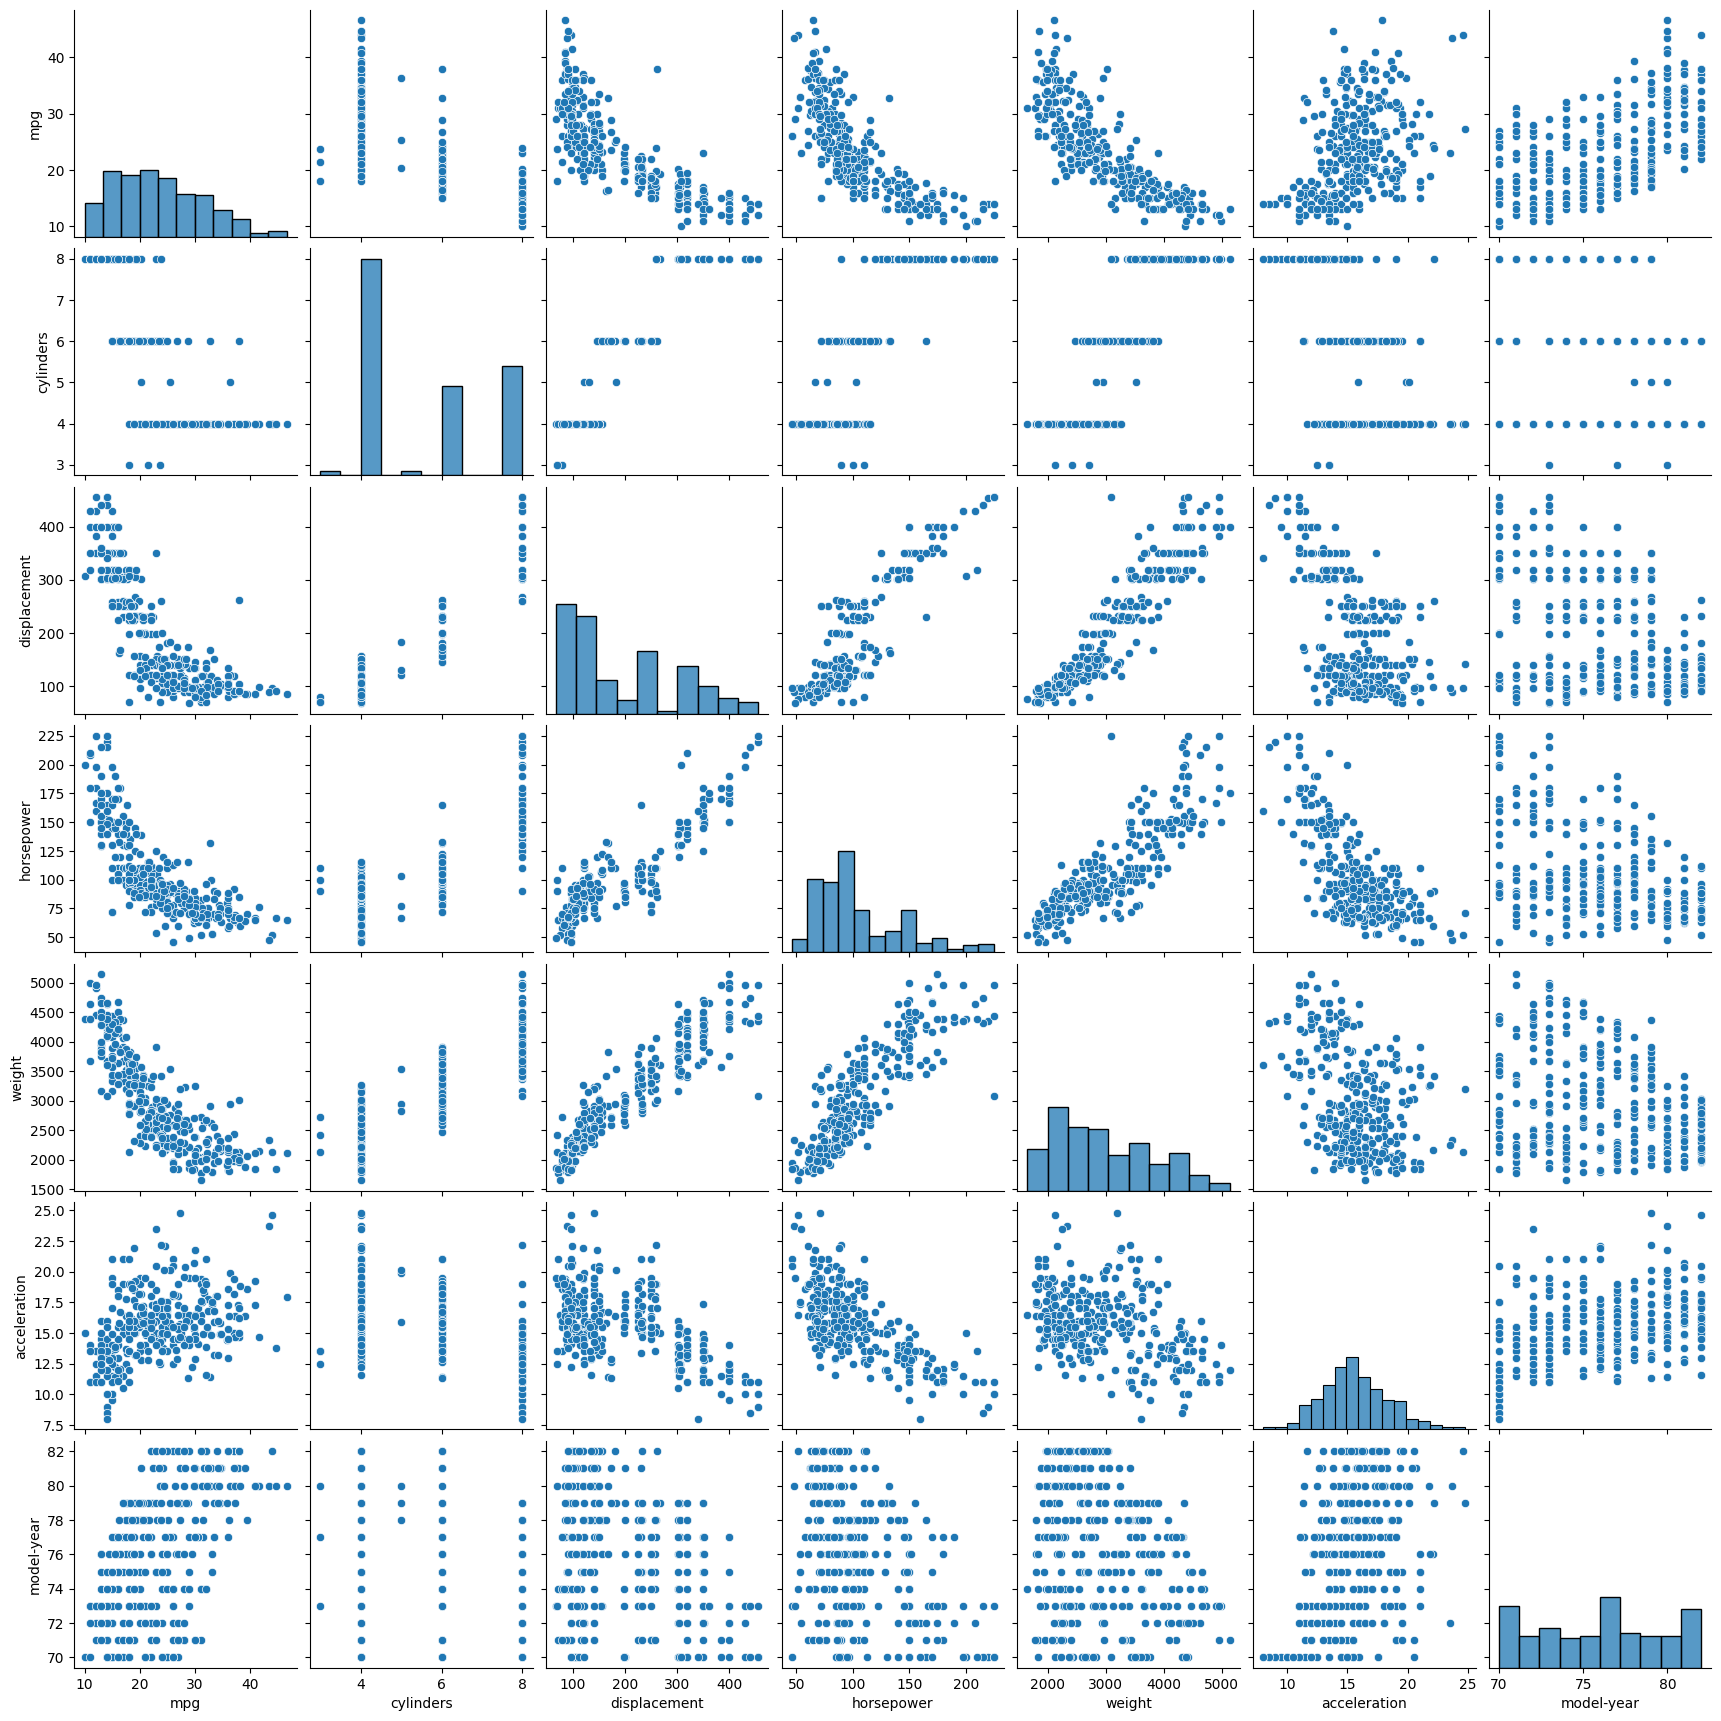

In [12]:
sns.pairplot(train_dataset)
train_dataset.describe().transpose()

In [13]:
normalizer = keras.layers.Normalization() # This will normalize the data so that it is between 0 and 1 # like scaling
normalizer.adapt(np.array(x_train)) # this will adapt the data to the normalizer

In [15]:
model = keras.Sequential([
    normalizer,layers.Dense(units=6,activation='relu'),
               layers.Dense(units=6,activation='relu'),
               layers.Dense(units=1)])

# Important point
In a neural network, we generally expect the loss behavior (cost function) during epochs to be like this:

The training loss is reduced in each epoch, because the model is learning from the training data.
Validation Loss also decreases, but if it increases after a few epochs, it is a sign of Overfitting.

In [17]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),loss='mean_absolute_error') # set the optimizer and loss function

model.fit(x_train,y_train,epochs=200,validation_split=0.15)  # validation_split = 0.15 means 15% of the data will be used for validation to check if the model is overfitting

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 23.0623 - val_loss: 23.5721
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4879 - val_loss: 23.5362
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9294 - val_loss: 23.4996
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.0995 - val_loss: 23.4629
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.4647 - val_loss: 23.4254
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.0019 - val_loss: 23.3869
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.2494 - val_loss: 23.3481
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.9921 - val_loss: 23.3086
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.7672 - val_loss: 23.2685
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5554 - val_loss: 23.2277
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.6657 - val_loss: 23.1855
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

2.10213303565979

In [18]:
model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9716


2.10213303565979

In [20]:
test_predict = model.predict(x_test).flatten()
test_predict

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([15.843102 , 13.021741 , 13.0540495, 25.051516 , 19.897892 ,
       14.973693 , 14.123395 , 15.193584 , 16.669193 , 28.982344 ,
       25.297503 , 26.51067  , 13.871221 , 26.133305 , 13.985933 ,
       13.949827 , 13.944953 , 13.95845  , 17.095024 , 13.420418 ,
       13.912851 , 26.140343 , 20.58653  , 22.650465 , 28.76169  ,
       24.208494 , 16.738586 , 23.939371 , 16.57745  , 18.383686 ,
       27.692476 , 20.137325 , 17.44331  , 22.466833 , 28.010595 ,
       14.478782 , 18.646759 , 30.914738 , 30.64821  , 17.583826 ,
       30.397459 , 28.863731 , 15.342298 , 33.460655 , 33.68115  ,
       33.541817 , 19.568815 , 21.604843 , 21.161873 , 26.737572 ,
       30.372944 , 20.236666 , 31.437965 , 17.400805 , 17.527504 ,
       17.03553  , 33.91628  , 33.93186  , 21.518656 , 26.412258 ,
       34.965553 , 29.828234 , 32.214977 , 29.604675 , 29.236021 ,
       37.94019  , 37.778378 , 35.36946  , 33.892044 , 33.674515 ,
       25.069582 , 25.587547 , 22.80421  , 22.606047 , 31.2675

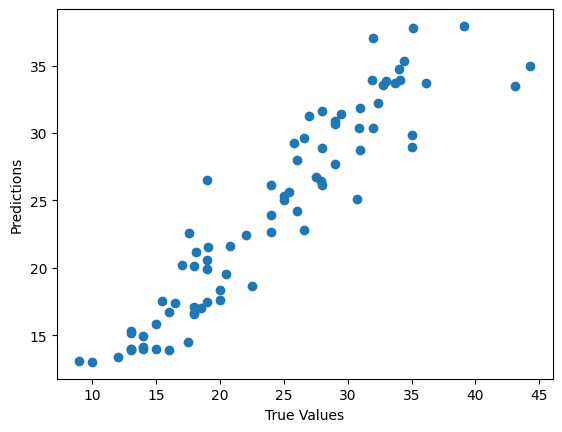

In [21]:
plt.scatter(y_test,test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
# If the points are located in an oblique line (diameter 45 degrees):
#It shows that the model has made predictions correctly.
#It means that the predicted value (test_predict) is almost equal to the actual value (y_test).